In [1]:
import pid_df
import matplotlib.pyplot as plt
from pandas import read_csv
from seaborn import distplot

pid_kp_pip = pid_df.pid_df('../SingleTracks/kp_geant3_tracks_30274-30795.csv','kp',num_particles=50000)
pid_kp_pip.add_df('../SingleTracks/pip_geant3_tracks_30274-30795.csv','pip',num_particles=50000)

features = ['dEdx_SC','dEdx_TOF','deltaPhitoShower_BCAL','deltaZToShower_BCAL','E_BCAL','E_preshower_BCAL','E_L2_BCAL','E_L3_BCAL','E_L4_BCAL','sigLong_BCAL','sigTrans_BCAL','energy_FCAL','DOCATrack_FCAL','sumU_FCAL','sumV_FCAL','E1E9_FCAL','E9E25_FCAL','chisq_track','Ndof_track','NDF_DCdEdx','ChiSq_DCdEdx','dEdx_FDC','dEdx_CDC','p','theta','measuredBeta','t1','NDF_timing','ChiSq_timing']
features_data = ['dEdx_SC','dEdx_TOF','DeltaPhi_BCAL','DeltaZ_BCAL','E_BCAL','Preshower_E_BCAL','EL2_BCAL','EL3_BCAL','EL4_BCAL','SigLong_BCAL','SigTrans_BCAL','E_FCAL','DOCA_FCAL','SumU_FCAL','SumV_FCAL','E1E9_FCAL','E9E25_FCAL','ChiSq_Tracing','NDF_Tracking','NDF_DcdEdx','ChiSq_DcdEdx','dEdx_FDC','dEdx_CDC','p','theta','Beta_Timing_Measured','HitTime','NDF_Timing_Measured','ChiSq_Timing_Measured']

pid_kp_pip.set_features(features)

cv_analysis = {}
roc_curves = {}
ml_metrics = {}
ml_confusions = {}

0.050928217695722235
0.03181543990572449


In [2]:
kpkmpi0_df = read_csv('../SingleTracks/kpkmpi0_tracks_30274-30795.csv')
kpkmpi0_df.dropna()

,beam_energy,pi0_mass,ppi0_mass,kpkm_mass,pkp_mass,pkm_mass,kppi0_mass,kmpi0_mass,kpkmpi0_mass,missing_mass_squared,...,km_SigLong_BCAL,km_SigTrans_BCAL,km_DeltaPhi_BCAL,km_DeltaZ_BCAL,km_E_FCAL,km_E1E9_FCAL,km_E9E25_FCAL,km_SumU_FCAL,km_SumV_FCAL,km_DOCA_FCAL
0,10.02910,0.132640,2.18065,1.01305,2.82496,2.75487,0.709504,0.785147,1.28106,-0.002354,...,0.00000,0.000000,999.000000,999.000000,2.179270,0.626509,0.948805,4.82764,4.727640,1.480470
1,10.16120,0.133323,2.18329,1.01344,2.83379,2.78771,0.710219,0.787162,1.28292,-0.001513,...,0.00000,0.000000,999.000000,999.000000,2.179270,0.626509,0.948805,4.82764,4.727640,1.480470
2,8.14022,0.143454,1.34955,1.85426,1.62745,2.30888,1.086930,2.124160,2.93662,0.004581,...,0.00000,0.000000,999.000000,999.000000,0.472826,0.659100,1.000000,3.24015,0.980209,0.884880
3,8.04416,0.142594,1.34759,1.83962,1.62515,2.30043,1.081990,2.108990,2.91462,0.010361,...,0.00000,0.000000,999.000000,999.000000,0.472826,0.659100,1.000000,3.24015,0.980209,0.884880
4,6.43391,0.130061,1.35009,1.33236,2.49988,1.82616,1.271830,0.961008,1.95241,-0.000002,...,0.00000,0.000000,999.000000,999.000000,0.637150,0.609951,1.000000,6.60236,0.636767,0.516615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537442,7.02714,0.109248,1.78152,1.58561,2.26714,1.57487,1.166050,1.469270,2.35228,-0.001067,...,4.65078,0.007850,-0.003663,0.493578,0.000000,0.000000,0.000000,0.00000,0.000000,999.000000
537446,4.99400,0.132447,1.65207,1.19528,2.02129,1.88378,0.682144,0.874585,1.46763,0.000091,...,8.25048,0.014993,0.000333,1.388050,0.000000,0.000000,0.000000,0.00000,0.000000,999.000000
537447,5.85721,0.129026,1.48703,1.60156,2.46857,1.51019,0.782388,0.936829,1.88433,-0.002179,...,3.50594,0.009755,0.009438,0.477312,0.000000,0.000000,0.000000,0.00000,0.000000,999.000000
537448,5.62610,0.123287,1.45325,1.58025,2.43175,1.50421,0.764897,0.913087,1.84752,0.001115,...,3.50594,0.009755,0.009438,0.477312,0.000000,0.000000,0.000000,0.00000,0.000000,999.000000


In [3]:
features = ['dEdx_SC','dEdx_TOF','deltaPhitoShower_BCAL','deltaZToShower_BCAL','E_BCAL','E_preshower_BCAL','E_L2_BCAL','E_L3_BCAL','E_L4_BCAL','sigLong_BCAL','sigTrans_BCAL','energy_FCAL','DOCATrack_FCAL','sumU_FCAL','sumV_FCAL','E1E9_FCAL','E9E25_FCAL','chisq_track','Ndof_track','NDF_DCdEdx','ChiSq_DCdEdx','dEdx_FDC','dEdx_CDC','p','theta','measuredBeta','t1','NDF_timing','ChiSq_timing']
features_data = ['dEdx_SC','dEdx_TOF','DeltaPhi_BCAL','DeltaZ_BCAL','E_BCAL','Preshower_E_BCAL','EL2_BCAL','EL3_BCAL','EL4_BCAL','SigLong_BCAL','SigTrans_BCAL','E_FCAL','DOCA_FCAL','SumU_FCAL','SumV_FCAL','E1E9_FCAL','E9E25_FCAL','ChiSq_Tracing','NDF_Tracking','NDF_DcdEdx','ChiSq_DcdEdx','dEdx_FDC','dEdx_CDC','p','theta','Beta_Timing_Measured','HitTime','NDF_Timing_Measured','ChiSq_Timing_Measured']

print(len(features))
print(len(features_data))

mapping_features = {}

for f,f2 in zip(features,features_data):
    mapping_features[f2]=f

print(mapping_features)

col_select = []
for col in kpkmpi0_df.columns:
    if col.startswith('kp_'):
        if col == 'kp_Beta_Timing' or col == 'kp_ChiSq_Timing' or col == 'kp_mass':
            continue
        print(col)
        col_select.append(col)
        
kp_data_df = kpkmpi0_df[col_select]

new_map = {}
for col in kp_data_df.columns:
    if col.replace('kp_','') == 'NDF_Timing':
        col = 'NDF_Timing_Measured'
    if col.replace('kp_','') == 'ChiSq_Timing':
        col = 'ChiSq_Timing_Measured'        
    try:
        new_map[col] = mapping_features[col.replace('kp_','')]
    except:
        pass

kp_data_df.columns = new_map.values()
kp_data_df = kp_data_df[pid_kp_pip.X.columns]
print(len(kp_data_df))

29
29
{'dEdx_SC': 'dEdx_SC', 'dEdx_TOF': 'dEdx_TOF', 'DeltaPhi_BCAL': 'deltaPhitoShower_BCAL', 'DeltaZ_BCAL': 'deltaZToShower_BCAL', 'E_BCAL': 'E_BCAL', 'Preshower_E_BCAL': 'E_preshower_BCAL', 'EL2_BCAL': 'E_L2_BCAL', 'EL3_BCAL': 'E_L3_BCAL', 'EL4_BCAL': 'E_L4_BCAL', 'SigLong_BCAL': 'sigLong_BCAL', 'SigTrans_BCAL': 'sigTrans_BCAL', 'E_FCAL': 'energy_FCAL', 'DOCA_FCAL': 'DOCATrack_FCAL', 'SumU_FCAL': 'sumU_FCAL', 'SumV_FCAL': 'sumV_FCAL', 'E1E9_FCAL': 'E1E9_FCAL', 'E9E25_FCAL': 'E9E25_FCAL', 'ChiSq_Tracing': 'chisq_track', 'NDF_Tracking': 'Ndof_track', 'NDF_DcdEdx': 'NDF_DCdEdx', 'ChiSq_DcdEdx': 'ChiSq_DCdEdx', 'dEdx_FDC': 'dEdx_FDC', 'dEdx_CDC': 'dEdx_CDC', 'p': 'p', 'theta': 'theta', 'Beta_Timing_Measured': 'measuredBeta', 'HitTime': 't1', 'NDF_Timing_Measured': 'NDF_timing', 'ChiSq_Timing_Measured': 'ChiSq_timing'}
kp_p
kp_theta
kp_NDF_Tracking
kp_ChiSq_Tracing
kp_NDF_DcdEdx
kp_ChiSq_DcdEdx
kp_HitTime
kp_NDF_Timing
kp_Beta_Timing_Measured
kp_ChiSq_Timing_Measured
kp_dEdx_CDC
kp_dEdx_

## Boosted decision tree

[[0.98069807 0.01930193]
 [0.03719628 0.96280372]]
0.9939988399399885
0.97175
0.9436512897980744


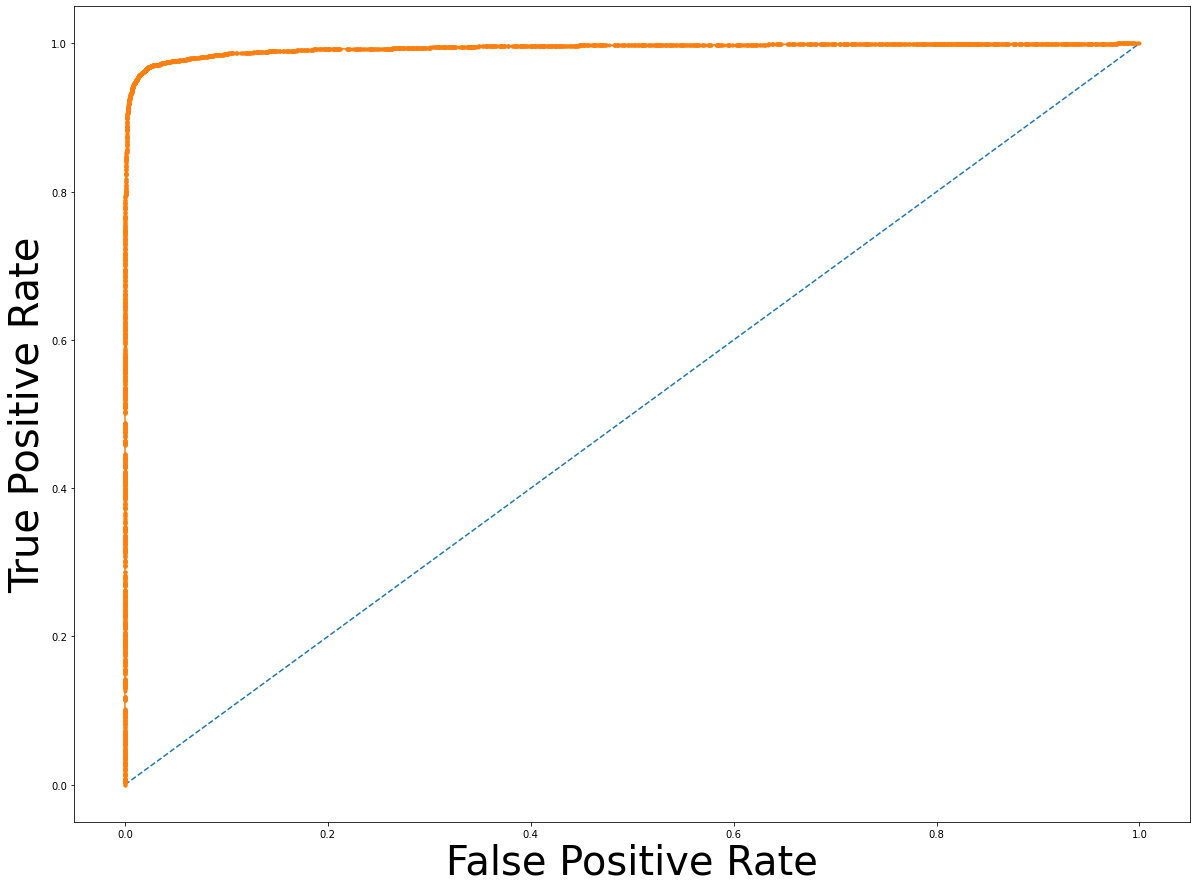

In [47]:
pid_kp_pip.bdt_model('ss')

pid_kp_pip.predict()
pid_kp_pip.roc_auc()
fig,ax = plt.subplots(figsize=(20,15))
pid_kp_pip.roc_curve()
roc_curves['kp_pip_bdt_ns_fpr'] = pid_kp_pip.ns_fpr
roc_curves['kp_pip_bdt_ns_tpr'] = pid_kp_pip.ns_tpr
roc_curves['kp_pip_bdt_lr_fpr'] = pid_kp_pip.lr_fpr
roc_curves['kp_pip_bdt_lr_tpr'] = pid_kp_pip.lr_tpr

ml_metrics['kp_pip_bdt_auc'] = pid_kp_pip.lr_auc
ml_metrics['kp_pip_bdt_acc'] = pid_kp_pip.accuracy

pid_kp_pip.confusion_matrix()
ml_confusions['kp_pip_bdt_confusion'] = pid_kp_pip.confusion

print(pid_kp_pip.confusion)
print(pid_kp_pip.lr_auc)
print(pid_kp_pip.accuracy)

pid_kp_pip.mcc()
print(pid_kp_pip.mcc_score)

29
30
0         kp
1        pip
2         kp
3        pip
4         kp
        ... 
99995    pip
99996     kp
99997     kp
99998    pip
99999    pip
Name: particle_id, Length: 100000, dtype: object
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


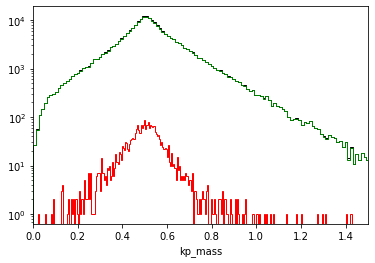

In [48]:
print(len(kp_data_df.columns))
print(len(pid_kp_pip.features))
print(pid_kp_pip.pid.particle_id)
print(pid_kp_pip.y)
prediction = pid_kp_pip.clf.predict(kp_data_df)
w_bool = kpkmpi0_df.weight == 1
kp_bool = prediction==0
pip_bool = prediction==1
distplot(kpkmpi0_df[w_bool].kp_mass,kde=False,bins=500,color='k',hist_kws={'alpha':1,'histtype':'step'})
distplot(kpkmpi0_df[w_bool & kp_bool].kp_mass,kde=False,bins=500,color='g',hist_kws={'alpha':1,'histtype':'step'})
distplot(kpkmpi0_df[w_bool & pip_bool].kp_mass,kde=False,bins=500,color='r',hist_kws={'alpha':1,'histtype':'step'})
plt.xlim(0,1.5)
plt.yscale('log')

dEdx_SC 0.11561759811203638
dEdx_TOF 0.004037318879103654
deltaPhitoShower_BCAL 2.766174035738139e-05
deltaZToShower_BCAL 0.0
E_BCAL 0.013223828259075083
E_preshower_BCAL 0.0001319921626621145
E_L2_BCAL 0.000747653232975343
E_L3_BCAL 0.0005596473874671478
E_L4_BCAL 0.001510121423318806
sigLong_BCAL 0.016994716838670175
sigTrans_BCAL 0.04878810210391694
energy_FCAL 1.1006098386524652e-05
DOCATrack_FCAL 0.0
sumU_FCAL 0.0
sumV_FCAL 0.0
E1E9_FCAL 0.0
E9E25_FCAL 4.571090985152364e-05
chisq_track 8.88456904230679e-05
Ndof_track 0.00572983807601736
NDF_DCdEdx 0.00078708681102954
ChiSq_DCdEdx 0.02543599783134574
dEdx_FDC 0.01418116535982267
dEdx_CDC 0.0054746118104197624
p 0.0891204953294828
theta 0.009895827038635768
measuredBeta 0.14959166159980006
t1 0.17837492916159833
NDF_timing 0.0
ChiSq_timing 0.3196241841436039


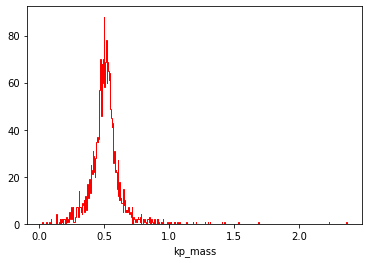

In [49]:
distplot(kpkmpi0_df[w_bool & pip_bool].kp_mass,kde=False,bins=500,color='r',hist_kws={'alpha':1,'histtype':'step'})
high_score = ['dEdx_SC','dEdx_TOF','deltaPhitoShower_BCAL','E_BCAL','p','theta','measuredBeta','t1','ChiSq_timing']
for f,s in zip(pid_kp_pip.features[:-1],pid_kp_pip.clf.feature_importances_):
    print(f,s)
    


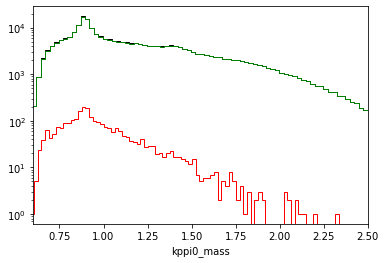

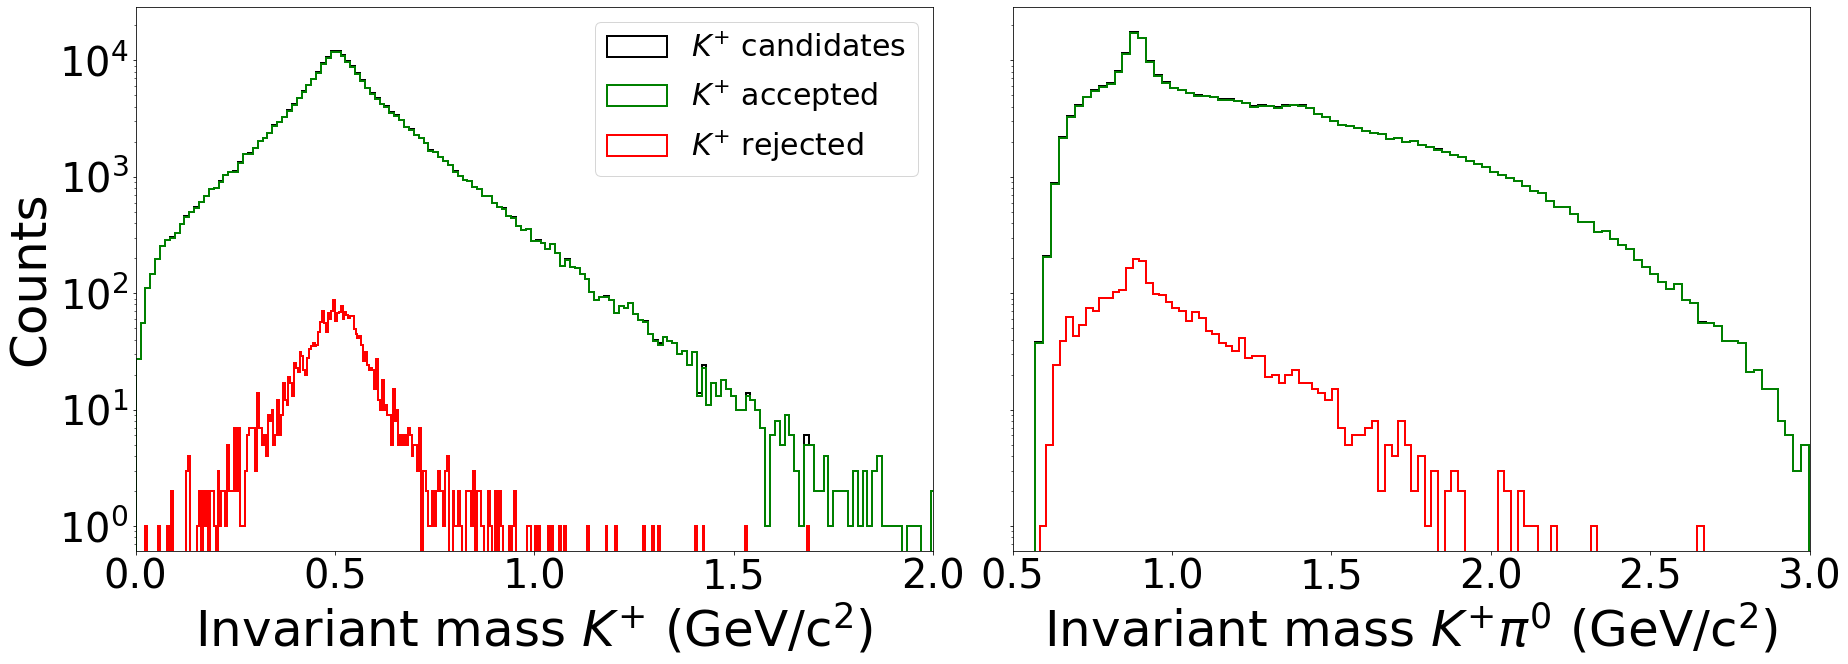

In [88]:
distplot(kpkmpi0_df[w_bool].kppi0_mass,kde=False,bins=100,color='k',hist_kws={'alpha':1,'histtype':'step'})
distplot(kpkmpi0_df[w_bool & kp_bool].kppi0_mass,kde=False,bins=100,color='g',hist_kws={'alpha':1,'histtype':'step'})
distplot(kpkmpi0_df[w_bool & pip_bool].kppi0_mass,kde=False,bins=100,color='r',hist_kws={'alpha':1,'histtype':'step'})
plt.xlim(0.6,2.5)
plt.yscale('log')

fig,ax = plt.subplots(1,2,sharey=True,figsize=(30,10))
ax[0].set_yscale('log')
ax[0].set_xlim(0,2.0)
distplot(kpkmpi0_df[w_bool].kp_mass,kde=False,bins=500,color='k',hist_kws={'alpha':1,'histtype':'step','linewidth':2.0},ax=ax[0])
distplot(kpkmpi0_df[w_bool & kp_bool].kp_mass,kde=False,bins=500,color='g',hist_kws={'alpha':1,'histtype':'step','linewidth':2.0},ax=ax[0])
distplot(kpkmpi0_df[w_bool & pip_bool].kp_mass,kde=False,bins=500,color='r',hist_kws={'alpha':1,'histtype':'step','linewidth':2.0},ax=ax[0])
ax[0].set_ylabel('Counts',fontsize=50)
ax[0].set_xlabel(r'Invariant mass $K^{+}$ $(\mathrm{GeV/c^{2}})$',fontsize=50)
ax[0].legend(labels=[r'$K^{+}$ candidates','$K^{+}$ accepted','$K^{+}$ rejected'],fontsize=30)
ax[0].tick_params(axis='y',labelsize=40)
ax[0].tick_params(axis='x',labelsize=40)

ax[1].set_yscale('log')
ax[1].set_xlim(0.5,3.0)
distplot(kpkmpi0_df[w_bool].kppi0_mass,kde=False,bins=100,color='k',hist_kws={'alpha':1,'histtype':'step','linewidth':2.0},ax=ax[1])
distplot(kpkmpi0_df[w_bool & kp_bool].kppi0_mass,kde=False,bins=100,color='g',hist_kws={'alpha':1,'histtype':'step','linewidth':2.0},ax=ax[1])
distplot(kpkmpi0_df[w_bool & pip_bool].kppi0_mass,kde=False,bins=100,color='r',hist_kws={'alpha':1,'histtype':'step','linewidth':2.0},ax=ax[1])
#ax[1].tick_params(axis='y',which='both',left=False,labelbottom=False)
ax[1].tick_params(axis='y',labelsize=40)
ax[1].set_xlabel(r'Invariant mass $K^{+}\pi^{0}$ $(\mathrm{GeV/c^{2}})$',fontsize=50)
ax[1].tick_params(axis='x',labelsize=40)
plt.subplots_adjust(wspace=0.1, hspace=0)

fig.savefig('applied_to_data.pdf',dpi=300,bbox_inches='tight')

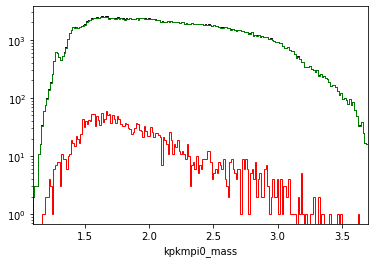

In [8]:
distplot(kpkmpi0_df[w_bool].kpkmpi0_mass,kde=False,bins=200,color='k',hist_kws={'alpha':1,'histtype':'step'})
distplot(kpkmpi0_df[w_bool & kp_bool].kpkmpi0_mass,kde=False,bins=200,color='g',hist_kws={'alpha':1,'histtype':'step'})
distplot(kpkmpi0_df[w_bool & pip_bool].kpkmpi0_mass,kde=False,bins=200,color='r',hist_kws={'alpha':1,'histtype':'step'})
plt.xlim(1.1,3.7)
plt.yscale('log')

In [9]:
pid_kp_pip.k_fold_cv(5)
count = 0
for train,test in pid_kp_pip.pid_k_fold_split:
    if count == 0:
        print(len(train),len(test))
    pid_kp_pip.bdt_model_cv(train,test)
    count+=1
    
cv_analysis['kp_pip_bdt_acc'] = pid_kp_pip.accuracies
cv_analysis['kp_pip_bdt_auc'] = pid_kp_pip.lr_aucs

80000 20000
0.9726 0.9949340144061297
0.97205 0.9944421394997927
0.9743 0.9950030637875314
0.97335 0.9947322867304361
0.9703 0.9939236389237991


## Random forest


0.998595909985959
0.98305


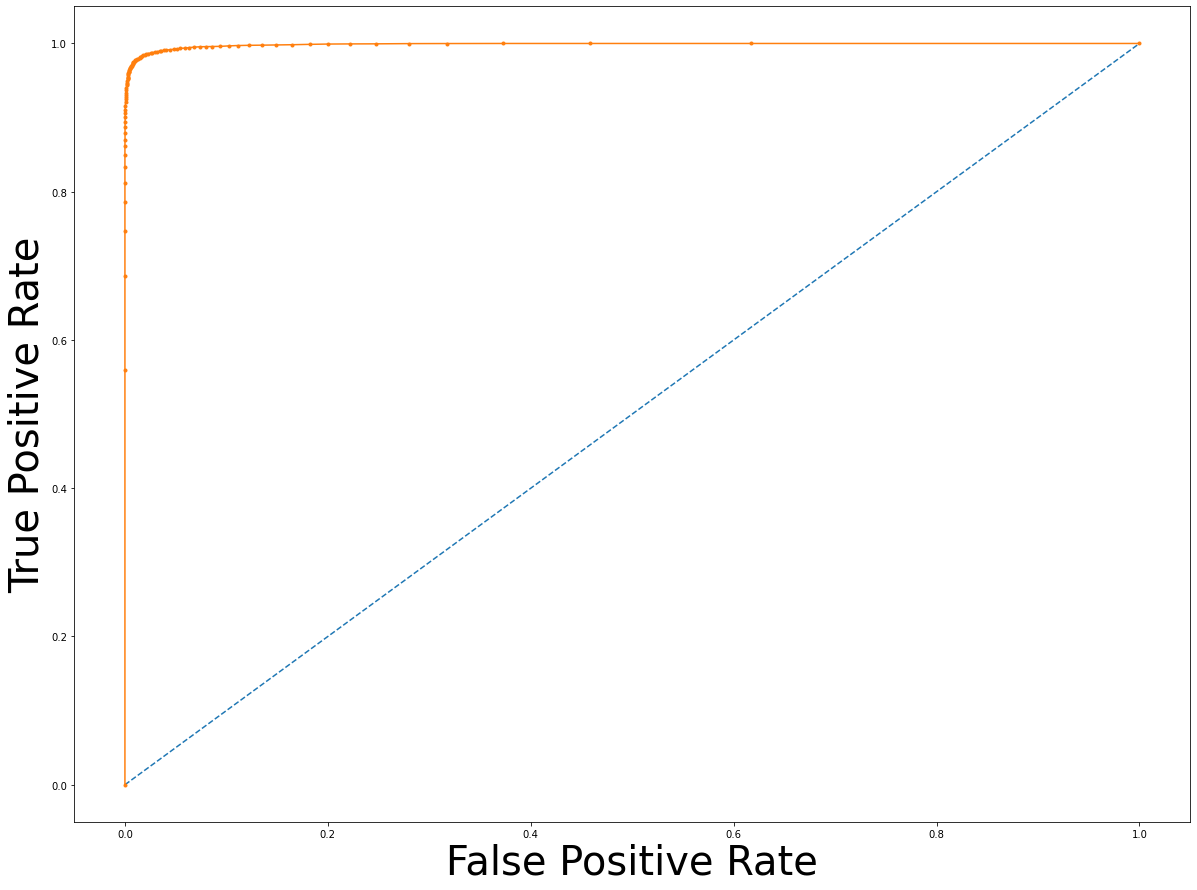

In [10]:
pid_kp_pip.rf_model('ss')

pid_kp_pip.predict()
pid_kp_pip.roc_auc()
fig,ax = plt.subplots(figsize=(20,15))
pid_kp_pip.roc_curve()
roc_curves['kp_pip_rf_ns_fpr'] = pid_kp_pip.ns_fpr
roc_curves['kp_pip_rf_ns_tpr'] = pid_kp_pip.ns_tpr
roc_curves['kp_pip_rf_lr_fpr'] = pid_kp_pip.lr_fpr
roc_curves['kp_pip_rf_lr_tpr'] = pid_kp_pip.lr_tpr

ml_metrics['kp_pip_rf_auc'] = pid_kp_pip.lr_auc
ml_metrics['kp_pip_rf_acc'] = pid_kp_pip.accuracy

pid_kp_pip.confusion_matrix()
ml_confusions['kp_pip_rf_confusion'] = pid_kp_pip.confusion

print(pid_kp_pip.lr_auc)
print(pid_kp_pip.accuracy)

Index(['beam_energy', 'pi0_mass', 'ppi0_mass', 'kpkm_mass', 'pkp_mass',
       'pkm_mass', 'kppi0_mass', 'kmpi0_mass', 'kpkmpi0_mass',
       'missing_mass_squared',
       ...
       'km_SigLong_BCAL', 'km_SigTrans_BCAL', 'km_DeltaPhi_BCAL',
       'km_DeltaZ_BCAL', 'km_E_FCAL', 'km_E1E9_FCAL', 'km_E9E25_FCAL',
       'km_SumU_FCAL', 'km_SumV_FCAL', 'km_DOCA_FCAL'],
      dtype='object', length=111)


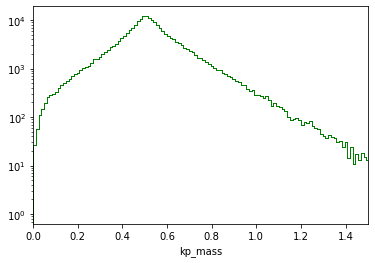

In [11]:
print(kpkmpi0_df.columns)
prediction = pid_kp_pip.clf.predict(kp_data_df)
w_bool = kpkmpi0_df.weight == 1
kp_bool = prediction==0
pip_bool = prediction==1
distplot(kpkmpi0_df[w_bool].kp_mass,kde=False,bins=500,color='k',hist_kws={'alpha':1,'histtype':'step'})
distplot(kpkmpi0_df[w_bool & kp_bool].kp_mass,kde=False,bins=500,color='g',hist_kws={'alpha':1,'histtype':'step'})
distplot(kpkmpi0_df[w_bool & pip_bool].kp_mass,kde=False,bins=500,color='r',hist_kws={'alpha':1,'histtype':'step'})
plt.xlim(0,1.5)
plt.yscale('log')

dEdx_SC 0.09403358871057996
dEdx_TOF 0.019410407225121527
deltaPhitoShower_BCAL 0.004793982756139201
deltaZToShower_BCAL 0.005673957842675223
E_BCAL 0.020231697300322562
E_preshower_BCAL 0.012039888675762443
E_L2_BCAL 0.013888608127190689
E_L3_BCAL 0.00633032307624876
E_L4_BCAL 0.011140975584243618
sigLong_BCAL 0.024344655681259316
sigTrans_BCAL 0.025276717816734667
energy_FCAL 0.008969235245103653
DOCATrack_FCAL 0.005378052050598986
sumU_FCAL 0.0037601023696431546
sumV_FCAL 0.003821059211978761
E1E9_FCAL 0.0027780175589958984
E9E25_FCAL 0.0021125654460729844
chisq_track 0.009192304110853975
Ndof_track 0.02395918400264893
NDF_DCdEdx 0.004472203934126683
ChiSq_DCdEdx 0.04778044307761011
dEdx_FDC 0.01915125896399441
dEdx_CDC 0.024502147063757182
p 0.05844621347808246
theta 0.04947556723368157
measuredBeta 0.11935856145863383
t1 0.20619093853084075
NDF_timing 0.0019452112379868178
ChiSq_timing 0.17154213222911188


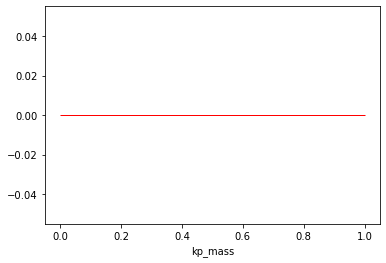

In [12]:
distplot(kpkmpi0_df[w_bool & pip_bool].kp_mass,kde=False,bins=500,color='r',hist_kws={'alpha':1,'histtype':'step'})

for f,s in zip(pid_kp_pip.features[:-1],pid_kp_pip.clf.feature_importances_):
    print(f,s)

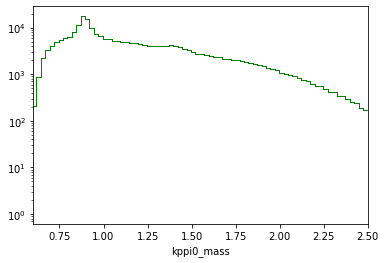

In [13]:
kp_bool = prediction==0
pip_bool = prediction==1
distplot(kpkmpi0_df[w_bool].kppi0_mass,kde=False,bins=100,color='k',hist_kws={'alpha':1,'histtype':'step'})
distplot(kpkmpi0_df[w_bool & kp_bool].kppi0_mass,kde=False,bins=100,color='g',hist_kws={'alpha':1,'histtype':'step'})
distplot(kpkmpi0_df[w_bool & pip_bool].kppi0_mass,kde=False,bins=100,color='r',hist_kws={'alpha':1,'histtype':'step'})
plt.xlim(0.6,2.5)
plt.yscale('log')

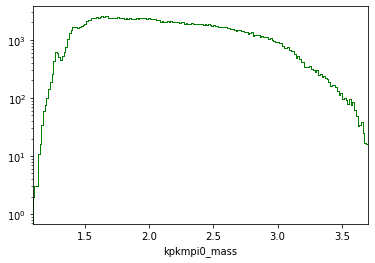

In [14]:
kp_bool = prediction==0
pip_bool = prediction==1
distplot(kpkmpi0_df[w_bool].kpkmpi0_mass,kde=False,bins=200,color='k',hist_kws={'alpha':1,'histtype':'step'})
distplot(kpkmpi0_df[w_bool & kp_bool].kpkmpi0_mass,kde=False,bins=200,color='g',hist_kws={'alpha':1,'histtype':'step'})
distplot(kpkmpi0_df[w_bool & pip_bool].kpkmpi0_mass,kde=False,bins=200,color='r',hist_kws={'alpha':1,'histtype':'step'})
plt.xlim(1.1,3.7)
plt.yscale('log')

In [15]:
pid_kp_pip.k_fold_cv(5)
count = 0
for train,test in pid_kp_pip.pid_k_fold_split:
    if count == 0:
        print(len(train),len(test))
    pid_kp_pip.rf_model_cv(train,test)
    count+=1
    
cv_analysis['kp_pip_rf_acc'] = pid_kp_pip.accuracies
cv_analysis['kp_pip_rf_auc'] = pid_kp_pip.lr_aucs

80000 20000
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0


## Support vector machine

pid_kp_pip.svm_model('ss')

pid_kp_pip.predict()
pid_kp_pip.roc_auc()
fig,ax = plt.subplots(figsize=(20,15))
pid_kp_pip.roc_curve()
roc_curves['kp_pip_svm_ns_fpr'] = pid_kp_pip.ns_fpr
roc_curves['kp_pip_svm_ns_tpr'] = pid_kp_pip.ns_tpr
roc_curves['kp_pip_svm_lr_fpr'] = pid_kp_pip.lr_fpr
roc_curves['kp_pip_svm_lr_tpr'] = pid_kp_pip.lr_tpr

ml_metrics['kp_pip_svm_auc'] = pid_kp_pip.lr_auc
ml_metrics['kp_pip_svm_acc'] = pid_kp_pip.accuracy

pid_kp_pip.confusion_matrix()
ml_confusions['kp_pip_svm_confusion'] = pid_kp_pip.confusion

print(pid_kp_pip.lr_auc)
print(pid_kp_pip.accuracy)

print(kpkmpi0_df.columns)
prediction = pid_kp_pip.clf.predict(kp_data_df)
w_bool = kpkmpi0_df.weight == 1
kp_bool = prediction==0
pip_bool = prediction==1
distplot(kpkmpi0_df[w_bool].kp_mass,kde=False,bins=500,color='k',hist_kws={'alpha':1,'histtype':'step'})
distplot(kpkmpi0_df[w_bool & kp_bool].kp_mass,kde=False,bins=500,color='g',hist_kws={'alpha':1,'histtype':'step'})
distplot(kpkmpi0_df[w_bool & pip_bool].kp_mass,kde=False,bins=500,color='r',hist_kws={'alpha':1,'histtype':'step'})
plt.xlim(0,1.5)
plt.yscale('log')

kp_bool = prediction==0
pip_bool = prediction==1
distplot(kpkmpi0_df[w_bool].kppi0_mass,kde=False,bins=100,color='k',hist_kws={'alpha':1,'histtype':'step'})
distplot(kpkmpi0_df[w_bool & kp_bool].kppi0_mass,kde=False,bins=100,color='g',hist_kws={'alpha':1,'histtype':'step'})
distplot(kpkmpi0_df[w_bool & pip_bool].kppi0_mass,kde=False,bins=100,color='r',hist_kws={'alpha':1,'histtype':'step'})
plt.xlim(0.6,2.5)
plt.yscale('log')

kp_bool = prediction==0
pip_bool = prediction==1
distplot(kpkmpi0_df[w_bool].kpkmpi0_mass,kde=False,bins=200,color='k',hist_kws={'alpha':1,'histtype':'step'})
distplot(kpkmpi0_df[w_bool & kp_bool].kpkmpi0_mass,kde=False,bins=200,color='g',hist_kws={'alpha':1,'histtype':'step'})
distplot(kpkmpi0_df[w_bool & pip_bool].kpkmpi0_mass,kde=False,bins=200,color='r',hist_kws={'alpha':1,'histtype':'step'})
plt.xlim(1.1,3.7)
plt.yscale('log')

pid_kp_pip.k_fold_cv(5)
count = 0
for train,test in pid_kp_pip.pid_k_fold_split:
    if count == 0:
        print(len(train),len(test))
    pid_kp_pip.svm_model_cv(train,test)
    count+=1
    
cv_analysis['kp_pip_svm_acc'] = pid_kp_pip.accuracies
cv_analysis['kp_pip_svm_auc'] = pid_kp_pip.lr_aucs

## MLP classifier

0.9704440197044403
0.941


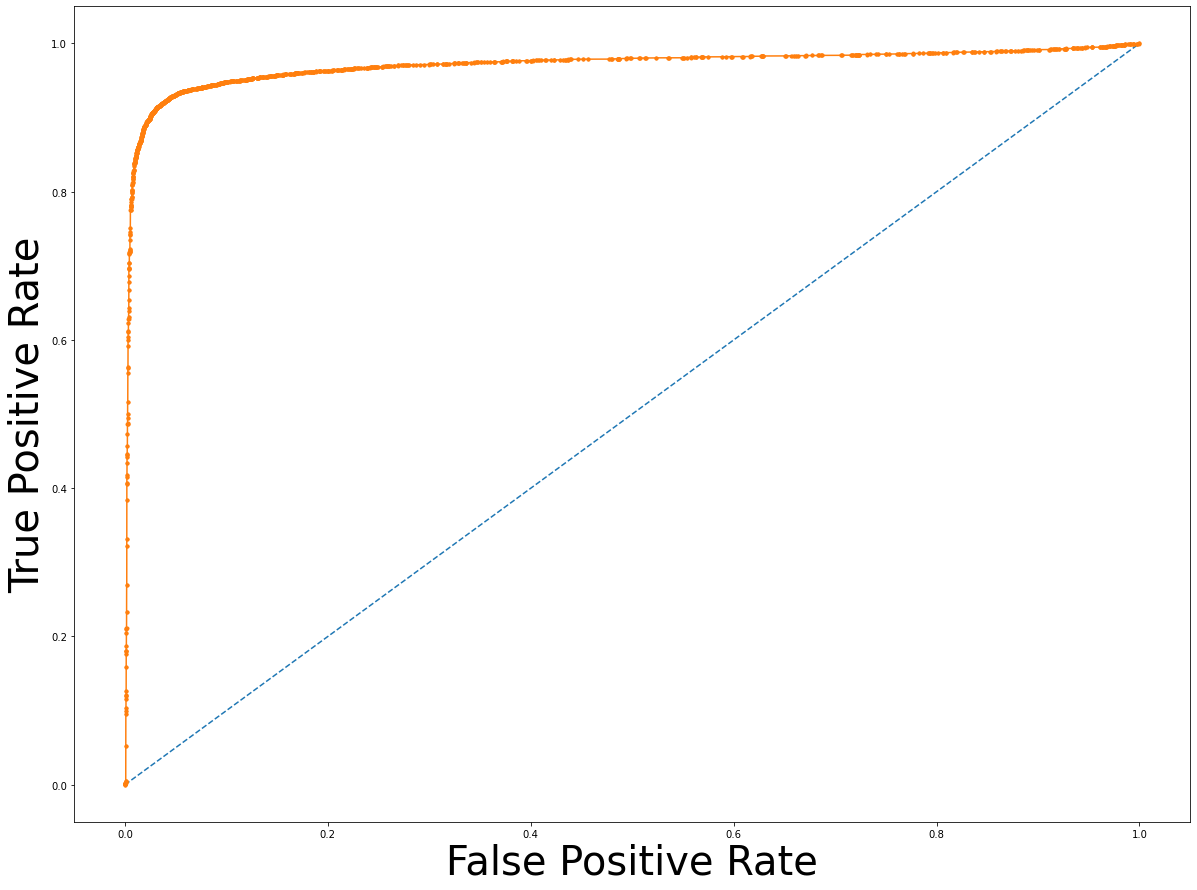

In [16]:
pid_kp_pip.nn_model('ss')

pid_kp_pip.predict()
pid_kp_pip.roc_auc()
fig,ax = plt.subplots(figsize=(20,15))
pid_kp_pip.roc_curve()
roc_curves['kp_pip_nn_ns_fpr'] = pid_kp_pip.ns_fpr
roc_curves['kp_pip_nn_ns_tpr'] = pid_kp_pip.ns_tpr
roc_curves['kp_pip_nn_lr_fpr'] = pid_kp_pip.lr_fpr
roc_curves['kp_pip_nn_lr_tpr'] = pid_kp_pip.lr_tpr

ml_metrics['kp_pip_nn_auc'] = pid_kp_pip.lr_auc
ml_metrics['kp_pip_nn_acc'] = pid_kp_pip.accuracy

pid_kp_pip.confusion_matrix()
ml_confusions['kp_pip_nn_confusion'] = pid_kp_pip.confusion

print(pid_kp_pip.lr_auc)
print(pid_kp_pip.accuracy)

Index(['beam_energy', 'pi0_mass', 'ppi0_mass', 'kpkm_mass', 'pkp_mass',
       'pkm_mass', 'kppi0_mass', 'kmpi0_mass', 'kpkmpi0_mass',
       'missing_mass_squared',
       ...
       'km_SigLong_BCAL', 'km_SigTrans_BCAL', 'km_DeltaPhi_BCAL',
       'km_DeltaZ_BCAL', 'km_E_FCAL', 'km_E1E9_FCAL', 'km_E9E25_FCAL',
       'km_SumU_FCAL', 'km_SumV_FCAL', 'km_DOCA_FCAL'],
      dtype='object', length=111)


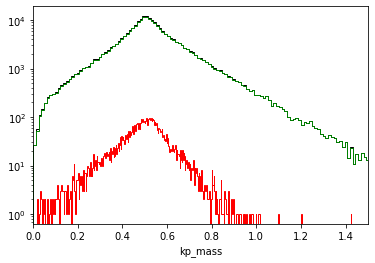

In [17]:
print(kpkmpi0_df.columns)
prediction = pid_kp_pip.clf.predict(kp_data_df)
w_bool = kpkmpi0_df.weight == 1
kp_bool = prediction==0
pip_bool = prediction==1
distplot(kpkmpi0_df[w_bool].kp_mass,kde=False,bins=500,color='k',hist_kws={'alpha':1,'histtype':'step'})
distplot(kpkmpi0_df[w_bool & kp_bool].kp_mass,kde=False,bins=500,color='g',hist_kws={'alpha':1,'histtype':'step'})
distplot(kpkmpi0_df[w_bool & pip_bool].kp_mass,kde=False,bins=500,color='r',hist_kws={'alpha':1,'histtype':'step'})
plt.xlim(0,1.5)
plt.yscale('log')

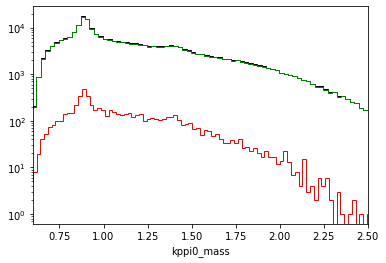

In [18]:
kp_bool = prediction==0
pip_bool = prediction==1
distplot(kpkmpi0_df[w_bool].kppi0_mass,kde=False,bins=100,color='k',hist_kws={'alpha':1,'histtype':'step'})
distplot(kpkmpi0_df[w_bool & kp_bool].kppi0_mass,kde=False,bins=100,color='g',hist_kws={'alpha':1,'histtype':'step'})
distplot(kpkmpi0_df[w_bool & pip_bool].kppi0_mass,kde=False,bins=100,color='r',hist_kws={'alpha':1,'histtype':'step'})
plt.xlim(0.6,2.5)
plt.yscale('log')

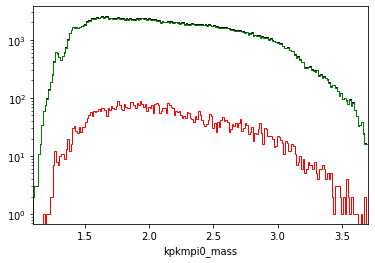

In [19]:
kp_bool = prediction==0
pip_bool = prediction==1
distplot(kpkmpi0_df[w_bool].kpkmpi0_mass,kde=False,bins=200,color='k',hist_kws={'alpha':1,'histtype':'step'})
distplot(kpkmpi0_df[w_bool & kp_bool].kpkmpi0_mass,kde=False,bins=200,color='g',hist_kws={'alpha':1,'histtype':'step'})
distplot(kpkmpi0_df[w_bool & pip_bool].kpkmpi0_mass,kde=False,bins=200,color='r',hist_kws={'alpha':1,'histtype':'step'})
plt.xlim(1.1,3.7)
plt.yscale('log')

In [20]:
pid_kp_pip.k_fold_cv(5)
count = 0
for train,test in pid_kp_pip.pid_k_fold_split:
    if count == 0:
        print(len(train),len(test))
    pid_kp_pip.nn_model_cv(train,test)
    count+=1
    
cv_analysis['kp_pip_nn_acc'] = pid_kp_pip.accuracies
cv_analysis['kp_pip_nn_auc'] = pid_kp_pip.lr_aucs

80000 20000
0.91455 0.9574636721730494
0.9131 0.9561140710502664
0.9142 0.9589163067247573
0.91635 0.9585714530860319
0.9108 0.9554734890007855


## AdaBoost

0.9720754247207544
0.91595


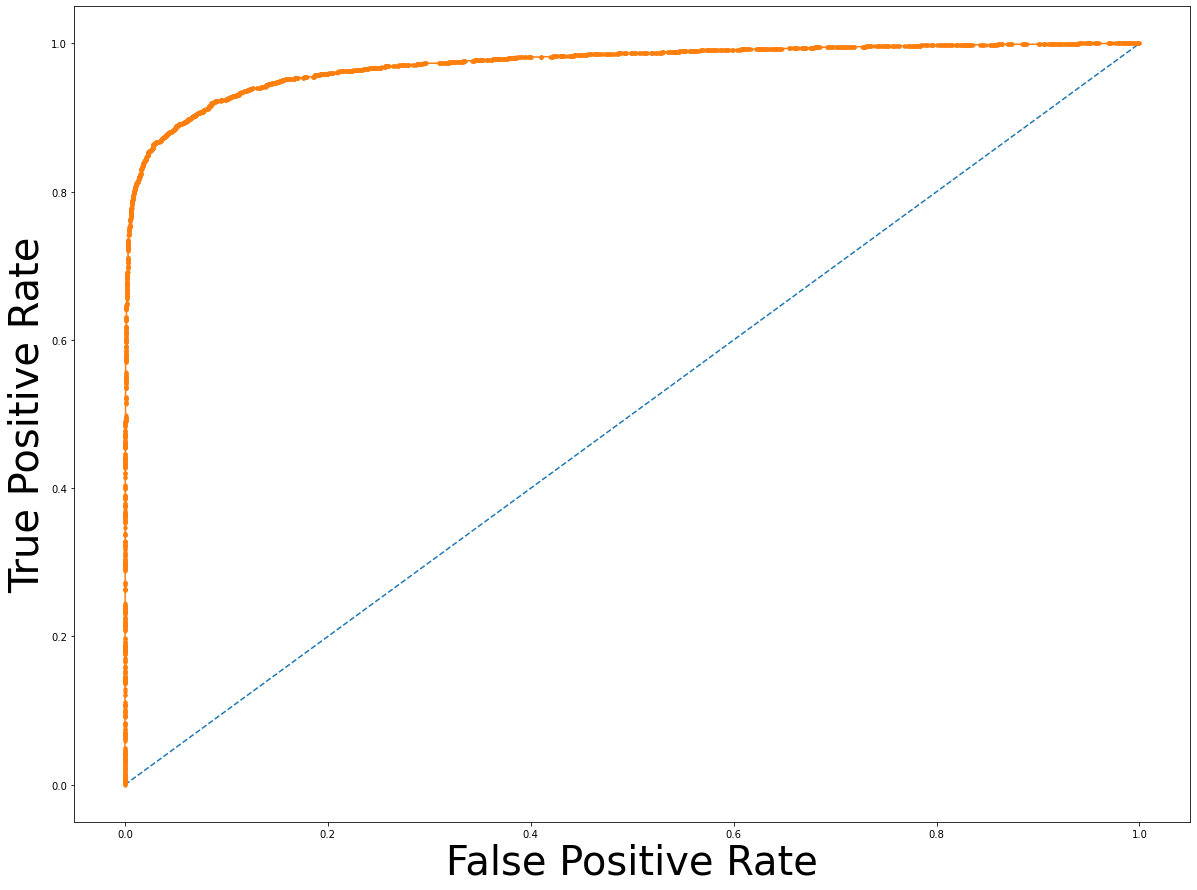

In [40]:
pid_kp_pip.ada_model('ss')

pid_kp_pip.predict()
pid_kp_pip.roc_auc()
fig,ax = plt.subplots(figsize=(20,15))
pid_kp_pip.roc_curve()
roc_curves['kp_pip_ada_ns_fpr'] = pid_kp_pip.ns_fpr
roc_curves['kp_pip_ada_ns_tpr'] = pid_kp_pip.ns_tpr
roc_curves['kp_pip_ada_lr_fpr'] = pid_kp_pip.lr_fpr
roc_curves['kp_pip_ada_lr_tpr'] = pid_kp_pip.lr_tpr

ml_metrics['kp_pip_ada_auc'] = pid_kp_pip.lr_auc
ml_metrics['kp_pip_ada_acc'] = pid_kp_pip.accuracy

pid_kp_pip.confusion_matrix()
ml_confusions['kp_pip_ada_confusion'] = pid_kp_pip.confusion

print(pid_kp_pip.lr_auc)
print(pid_kp_pip.accuracy)

Index(['beam_energy', 'pi0_mass', 'ppi0_mass', 'kpkm_mass', 'pkp_mass',
       'pkm_mass', 'kppi0_mass', 'kmpi0_mass', 'kpkmpi0_mass',
       'missing_mass_squared',
       ...
       'km_SigLong_BCAL', 'km_SigTrans_BCAL', 'km_DeltaPhi_BCAL',
       'km_DeltaZ_BCAL', 'km_E_FCAL', 'km_E1E9_FCAL', 'km_E9E25_FCAL',
       'km_SumU_FCAL', 'km_SumV_FCAL', 'km_DOCA_FCAL'],
      dtype='object', length=111)


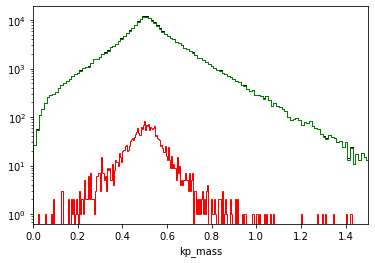

In [41]:
print(kpkmpi0_df.columns)
prediction = pid_kp_pip.clf.predict(kp_data_df)
w_bool = kpkmpi0_df.weight == 1
kp_bool = prediction==0
pip_bool = prediction==1
distplot(kpkmpi0_df[w_bool].kp_mass,kde=False,bins=500,color='k',hist_kws={'alpha':1,'histtype':'step'})
distplot(kpkmpi0_df[w_bool & kp_bool].kp_mass,kde=False,bins=500,color='g',hist_kws={'alpha':1,'histtype':'step'})
distplot(kpkmpi0_df[w_bool & pip_bool].kp_mass,kde=False,bins=500,color='r',hist_kws={'alpha':1,'histtype':'step'})
plt.xlim(0,1.5)
plt.yscale('log')

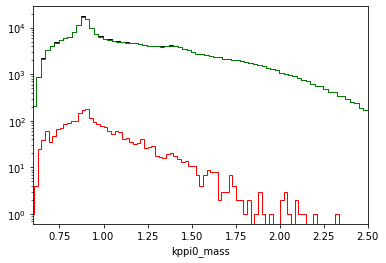

In [42]:
kp_bool = prediction==0
pip_bool = prediction==1
distplot(kpkmpi0_df[w_bool].kppi0_mass,kde=False,bins=100,color='k',hist_kws={'alpha':1,'histtype':'step'})
distplot(kpkmpi0_df[w_bool & kp_bool].kppi0_mass,kde=False,bins=100,color='g',hist_kws={'alpha':1,'histtype':'step'})
distplot(kpkmpi0_df[w_bool & pip_bool].kppi0_mass,kde=False,bins=100,color='r',hist_kws={'alpha':1,'histtype':'step'})
plt.xlim(0.6,2.5)
plt.yscale('log')

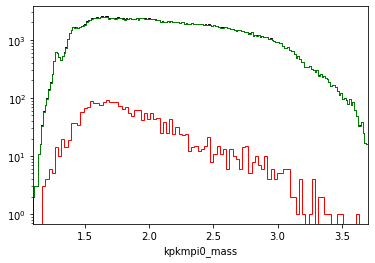

In [35]:
kp_bool = prediction==0
pip_bool = prediction==1
distplot(kpkmpi0_df[w_bool].kpkmpi0_mass,kde=False,bins=200,color='k',hist_kws={'alpha':1,'histtype':'step'})
distplot(kpkmpi0_df[w_bool & kp_bool].kpkmpi0_mass,kde=False,bins=200,color='g',hist_kws={'alpha':1,'histtype':'step'})
distplot(kpkmpi0_df[w_bool & pip_bool].kpkmpi0_mass,kde=False,bins=100,color='r',hist_kws={'alpha':1,'histtype':'step'})
plt.xlim(1.1,3.7)
plt.yscale('log')

In [25]:
pid_kp_pip.k_fold_cv(5)
count = 0
for train,test in pid_kp_pip.pid_k_fold_split:
    if count == 0:
        print(len(train),len(test))
    pid_kp_pip.ada_model_cv(train,test)
    count+=1
    
cv_analysis['kp_pip_ada_acc'] = pid_kp_pip.accuracies
cv_analysis['kp_pip_ada_auc'] = pid_kp_pip.lr_aucs

80000 20000
0.917 0.9723836264526381
0.91405 0.9710414423937298
0.91505 0.9726183845752111
0.9166 0.9725449791829301
0.91425 0.9713334912144006


In [26]:
import pandas as pd

cv_df = pd.DataFrame.from_dict(cv_analysis)
print(cv_df.columns)
acc_columns = []
auc_columns = []
for col in cv_df.columns:
    if 'acc' in col:
        acc_columns.append(col)
    if 'auc' in col:
        auc_columns.append(col)

Index(['kp_pip_bdt_acc', 'kp_pip_bdt_auc', 'kp_pip_rf_acc', 'kp_pip_rf_auc',
       'kp_pip_nn_acc', 'kp_pip_nn_auc', 'kp_pip_ada_acc', 'kp_pip_ada_auc'],
      dtype='object')


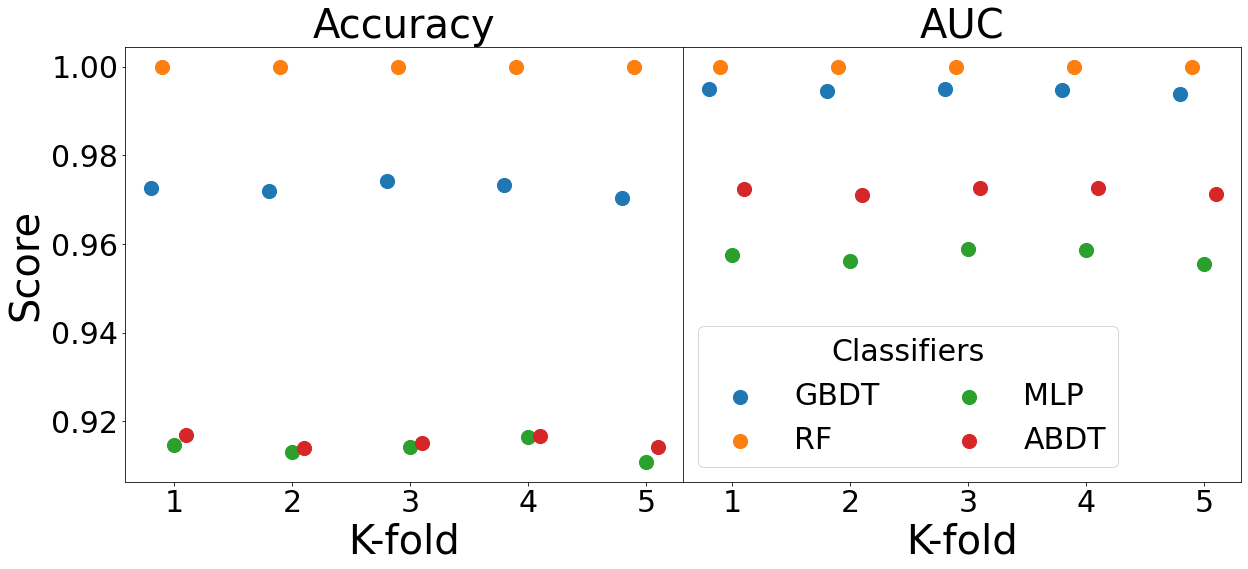

In [43]:
from numpy import arange
label_dict={'bdt':'GBDT','rf':'RF','nn':'MLP','ada':'ABDT'}
fig, ax = plt.subplots(1,2,sharex='all',sharey='row',figsize=(20,8))
i=0
for col in acc_columns:
    x = arange(0.8+i,5.8+i)
    ax[0].scatter(x,cv_df[col],label=label_dict[col.replace('kp_pip_','').replace('_acc','')],s=200)
    i+=0.1
ax[0].set_xlabel('K-fold',fontsize=40)
ax[0].set_ylabel('Score',fontsize=40)
ax[0].set_title(r'Accuracy',fontsize=40)
ax[0].tick_params(axis='x',labelsize=30)
ax[0].tick_params(axis='y',labelsize=30)

i=0
for col in auc_columns:
    x = arange(0.8+i,5.8+i)
    ax[1].scatter(x,cv_df[col],label=label_dict[col.replace('kp_pip_','').replace('_auc','')],s=200)
    i+=0.1
ax[1].set_xlabel('K-fold',fontsize=40)
ax[1].set_title('AUC',fontsize=40)
ax[1].tick_params(axis='x',labelsize=30)
ax[1].tick_params(axis='y',which='both',left=False,labelbottom=False)

plt.subplots_adjust(wspace=0., hspace=0)
ax[1].legend(loc='lower left',fontsize=30,title='Classifiers',title_fontsize=30,ncol=2)
fig.savefig('CV_analysis.pdf',dpi=300,bbox_inches='tight')

In [44]:
from statistics import mean,variance,stdev
acc_mean_kp_pip = {}
acc_stdev_kp_pip = {}

for col in acc_columns:
    acc_mean_kp_pip[col.replace('kp_pip_','').replace('_acc','')] = mean(cv_df[col])
    acc_stdev_kp_pip[col.replace('kp_pip_','').replace('_acc','')] = stdev(cv_df[col])    

auc_mean_kp_pip = {}
auc_stdev_kp_pip = {}

for col in auc_columns:
    auc_mean_kp_pip[col.replace('kp_pip_','').replace('_auc','')] = mean(cv_df[col])
    auc_stdev_kp_pip[col.replace('kp_pip_','').replace('_auc','')] = stdev(cv_df[col])    
    

In [45]:
kp_pip_roc_curves_tpr = []
kp_pip_roc_curves_fpr = []

for key in roc_curves.keys():
    if 'ns' in key:
        continue
    if 'kp_pip' in key:
        if 'tpr' in key:
            kp_pip_roc_curves_tpr.append(key)
        if 'fpr' in key:
            kp_pip_roc_curves_fpr.append(key)

print(kp_pip_roc_curves_tpr)
print(kp_pip_roc_curves_fpr)

['kp_pip_bdt_lr_tpr', 'kp_pip_rf_lr_tpr', 'kp_pip_nn_lr_tpr', 'kp_pip_ada_lr_tpr']
['kp_pip_bdt_lr_fpr', 'kp_pip_rf_lr_fpr', 'kp_pip_nn_lr_fpr', 'kp_pip_ada_lr_fpr']


dict_values([0.97252, 1.0, 0.9138000000000001, 0.91539])
dict_values([0.9946070286695378, 1.0, 0.9573077984069781, 0.9719843847637819])


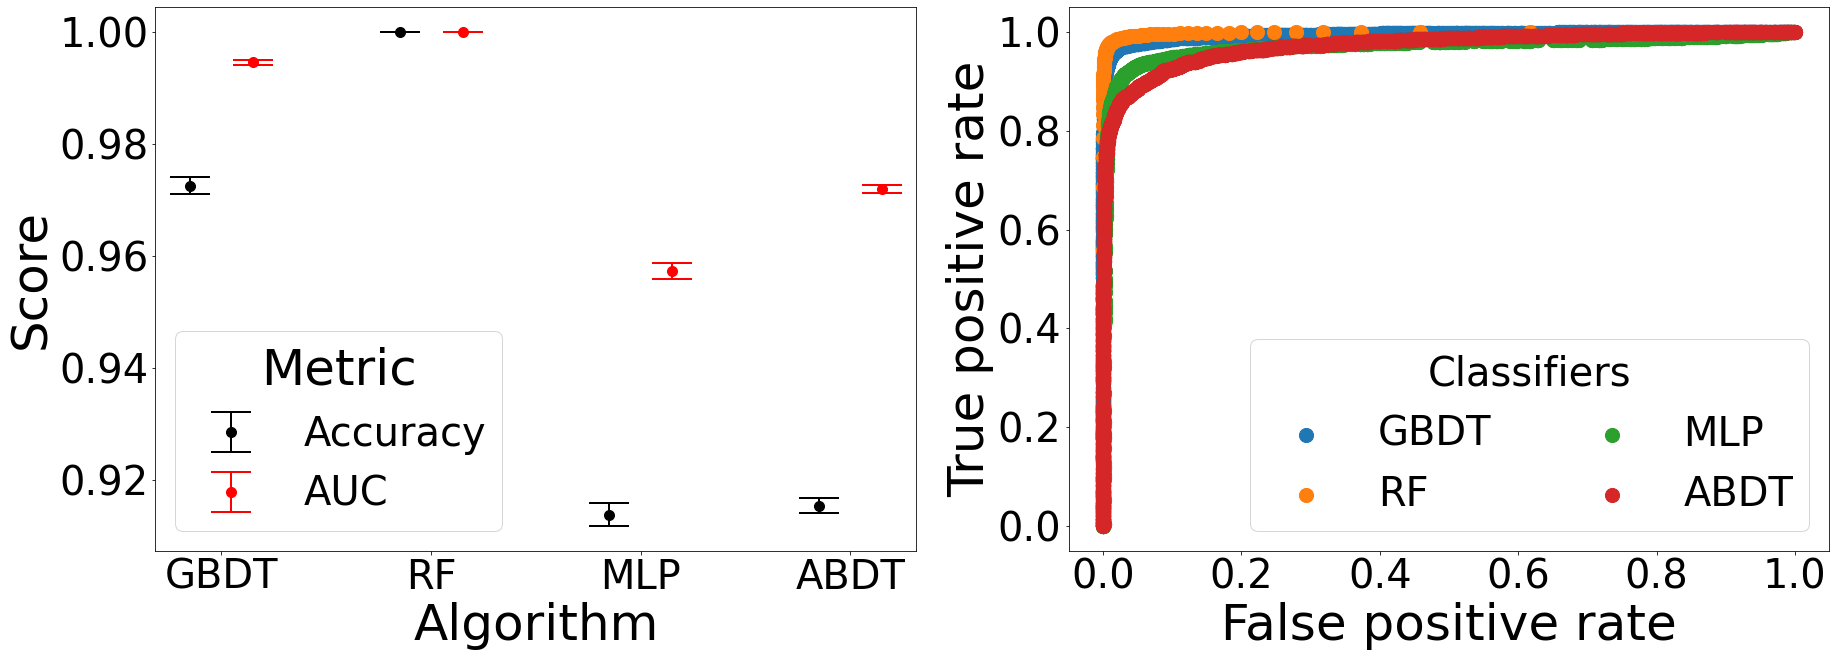

In [89]:
fig, ax = plt.subplots(1,2,figsize=(30,10))

x1 = arange(-0.15,3.85)
x2 = arange(0.15,4.15)

ax[0].errorbar(x1,acc_mean_kp_pip.values(),yerr=acc_stdev_kp_pip.values(),ms=20,fmt='.',color='k',lw=2,capsize=20,capthick=2,label=r'Accuracy')
labels = [item.get_text() for item in ax[0].get_xticklabels()]
count = 0
label_list = list(label_dict.values())
label_list.insert(0,'')
ax[0].set_xticklabels(label_list)
ax[0].tick_params(axis='y',labelsize=40)
ax[0].tick_params(axis='x',labelsize=40)
ax[0].set_xlabel('Algorithm',fontsize=50)
ax[0].set_ylabel('Score',fontsize=50)
ax[0].errorbar(x2,auc_mean_kp_pip.values(),yerr=auc_stdev_kp_pip.values(),ms=20,fmt='.',color='r',lw=2,capsize=20,capthick=2,label=r'AUC')
ax[0].tick_params(axis='x',labelsize=40)
ax[0].legend(fontsize=40,title='Metric',title_fontsize=50)

print(acc_mean_kp_pip.values())
print(auc_mean_kp_pip.values())

for tpr,fpr in zip(kp_pip_roc_curves_tpr,kp_pip_roc_curves_fpr):
    ax[1].scatter(roc_curves[fpr],roc_curves[tpr],s=200,label=label_dict[tpr.replace('kp_pip_','').replace('_lr_tpr',"")])
ax[1].set_ylabel('True positive rate',fontsize=50)
ax[1].set_xlabel('False positive rate',fontsize=50)
ax[1].tick_params(axis='y',labelsize=40)
ax[1].tick_params(axis='x',labelsize=40)
ax[1].legend(loc='lower right',fontsize=40,title='Classifiers',title_fontsize=40,ncol=2)

plt.subplots_adjust(wspace=0.2, hspace=0)
fig.savefig('roc_curve_analysis.pdf',dpi=300,bbox_inches='tight')